In [4]:
import pandas as pd
electric_utility_data = pd.read_csv("electric.csv")
electric_utility_data_1st_four_yrs = electric_utility_data[electric_utility_data["report_year"] <= 1998]

electric_utility_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
electric_utility_data_1st_four_yrs.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [6]:
electric_utility_data_1st_four_yrs.describe()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,5725.000000,5725.000000,5.725000e+03,5725.000000,5725.000000,5.725000e+03,5725.000000
mean,108.605939,1995.936594,3.019404e+06,10.604420,188.497989,3.952695e+03,2.911798
std,61.608116,1.426022,1.202901e+07,14.070916,2587.064225,1.549886e+05,11.498508
min,1.000000,1994.000000,1.000000e+00,0.000006,-85.760000,-8.564000e+01,-41.501000
25%,55.000000,1995.000000,4.838200e+04,1.020000,2.784000,2.473000e+00,1.304000
50%,120.000000,1996.000000,4.877310e+05,5.640600,18.050000,1.097700e+01,2.007000
75%,161.000000,1997.000000,1.708550e+06,20.880000,32.250000,2.937800e+01,3.019000
max,230.000000,1998.000000,5.558942e+08,341.260000,62609.000000,7.964521e+06,605.294000


In [7]:
electric_utility_data["fuel_unit"].unique()

array(['ton', 'mcf', 'kgU', 'bbl', 'gramsU', nan, 'mwdth', 'mmbtu',
       'mwhth', 'gal'], dtype=object)

In [8]:
fuel_unit =electric_utility_data.groupby("fuel_unit")["fuel_unit"].count()
fuel_unit

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [9]:
electric_utility_data.groupby("fuel_type_code_pudl")["fuel_type_code_pudl"].count()

fuel_type_code_pudl
coal        8547
gas        11486
nuclear      818
oil         8064
other        167
waste        441
Name: fuel_type_code_pudl, dtype: int64

Text(0.5, 0, 'Fuel Unit')

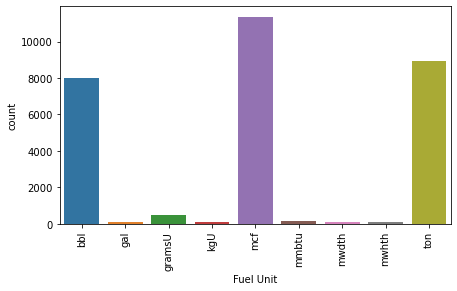

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':list(fuel_unit.index),
            'count':list(fuel_unit.values)})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')



Text(0.5, 0, 'Fuel Unit')

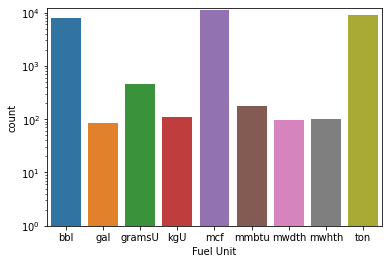

In [11]:
#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:

g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')